In [46]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from collections import defaultdict
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, NuSVC


In [47]:
df = pd.read_csv("../data/mushrooms_v2.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,s,f,g,t,p,f,d,n,k,...,s,c,c,p,w,t,p,k,n,u
1,e,x,g,y,t,a,d,c,b,k,...,y,e,e,p,w,o,p,u,a,p
2,e,k,s,n,t,l,f,w,b,n,...,k,b,b,p,w,o,p,n,v,g
3,p,b,y,w,t,y,f,c,n,e,...,k,w,g,p,w,b,n,k,s,u
4,e,b,s,g,f,n,n,c,b,o,...,s,w,e,p,w,b,z,w,a,g


In [48]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,4,3,2,12,...,4,9,9,2,4,4,8,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,2429,2574,1488,4329,2098,4644,4626,4843,1161,...,3363,2501,2446,5968,4703,4835,2358,1538,2591,2072


In [49]:
y = df["class"].to_frame()
y.head()

,class
0,p
1,e
2,e
3,p
4,e


In [50]:
X = df.drop("class", axis=1)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,s,f,g,t,p,f,d,n,k,e,...,s,c,c,p,w,t,p,k,n,u
1,x,g,y,t,a,d,c,b,k,e,...,y,e,e,p,w,o,p,u,a,p
2,k,s,n,t,l,f,w,b,n,t,...,k,b,b,p,w,o,p,n,v,g
3,b,y,w,t,y,f,c,n,e,t,...,k,w,g,p,w,b,n,k,s,u
4,b,s,g,f,n,n,c,b,o,t,...,s,w,e,p,w,b,z,w,a,g


In [51]:
attrDict = defaultdict(LabelEncoder)
X = X.apply(lambda x: attrDict[x.name].fit_transform(x))
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,6,2,1,1,4,0,...,2,1,1,0,2,3,5,2,2,5
1,5,1,9,1,0,1,0,0,4,0,...,3,2,2,0,2,2,5,6,0,4
2,3,2,4,1,3,2,2,0,5,1,...,1,0,0,0,2,2,5,3,4,1
3,0,3,8,1,8,2,0,1,1,1,...,1,7,3,0,2,0,4,2,3,5
4,0,2,3,0,5,3,0,0,6,1,...,2,7,2,0,2,0,7,7,0,1


In [52]:
yEncoder = LabelEncoder()
y = y.apply(lambda x: yEncoder.fit_transform(x))
le_name_mapping = dict(zip(yEncoder.classes_, yEncoder.transform(yEncoder.classes_)))

In [53]:
print(le_name_mapping)

{'e': 0, 'p': 1}


In [54]:
with open('../data/attributes_enc.sav', 'wb') as f:
    pickle.dump(attrDict, f)

with open('../data/labels_enc.sav', 'wb') as f:
    pickle.dump(yEncoder, f)

In [55]:
models = []
models.append(('KNN', KNeighborsClassifier(3)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GBC', GradientBoostingClassifier(n_estimators=500, learning_rate=0.5)))

In [56]:
results = []
names = []

In [57]:
def exportModel(model, name="model"):
    filename = f'{name}.sav'
    pickle.dump(model, open(filename, 'wb'))
    print(f"Model exported as: {filename}")


In [58]:
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10)
    cv_results = []
    maxx = 0
    for train_index, test_index in kfold.split(X, y):
        # print(train_index, test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        cv_results.append(recall)
        print(f"{name} - Recall: {str(recall)}, Acc: {str(accuracy)}, F1: {str(f1)}")
        if maxx < recall:
            maxx = recall
            exportModel(model, name)
            print(confusion_matrix(y_test, y_pred, [0,1]))
    cv_results = np.array(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Mean: %f (Std: %f) Max: %f" % (name, cv_results.mean(), cv_results.std(), cv_results.max())
    print(msg)

KNN - Recall: 0.3622448979591837, Acc: 0.5215252152521526, F1: 0.5099320478945448
Model exported as: KNN.sav
[[282 139]
 [250 142]]
KNN - Recall: 0.6020408163265306, Acc: 0.6494464944649446, F1: 0.6486407627665212
Model exported as: KNN.sav
[[292 129]
 [156 236]]
KNN - Recall: 0.6811224489795918, Acc: 0.7158671586715867, F1: 0.7154737429727239
Model exported as: KNN.sav
[[315 106]
 [125 267]]
KNN - Recall: 0.6862244897959183, Acc: 0.7170971709717097, F1: 0.7167880551183136
Model exported as: KNN.sav
[[314 107]
 [123 269]]
KNN - Recall: 0.6173469387755102, Acc: 0.7023370233702337, F1: 0.7000382670493371
KNN - Recall: 0.6428571428571429, Acc: 0.7060270602706027, F1: 0.7047410639241463
KNN - Recall: 0.80306905370844, Acc: 0.7881773399014779, F1: 0.788246747811947
Model exported as: KNN.sav
[[326  95]
 [ 77 314]]
KNN - Recall: 0.8312020460358056, Acc: 0.7807881773399015, F1: 0.7805433846847813
Model exported as: KNN.sav
[[309 112]
 [ 66 325]]
KNN - Recall: 0.7851662404092071, Acc: 0.649815

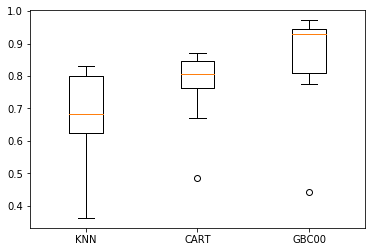

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()